# Earth model plotting and analysis

Avni has tools to visualize and interact with global models that are written in our custom hdf5 format (Citation of Tools paper?). Users have two options to use the tools. First, if a user has the model file saved locally, they can use Avni's model classes which include a variety of methods including reading, writing, and plotting. Typically, 3D global models have large files so it may not always be desirable to download them locally. In this case, users can use Avni's API to interact with our database of global Earth models. Below, we will show examples of both use cases. 

## 1) Working with local models

First we will show some examples of analysis and plotting of models that are saved locally in the avni hdf5 format. 

In [60]:
#make necessary imports
import avni
from avni import models
from avni.models import Model3D
from avni.plots import plot1section,plot1globalmap

### The Model 3D class

In Avni, the simplest way to interact with a global model is to use the Model3D class. This class has a variety of methods for reading, writing, and plotting <font color='red'>(will we have plotting methods?)</font>. It also contains tools to convert your own models into avni's hdf5 format. Here, we will give a brief tour of the class and outline some of its important methods. 

In the first example, we will read the 3D tomography model S362ANI+M (Moulik and Ekstrom, 2016). The most important attributes of the Model3D class are Model3D.data and Model3D.metadata, which are both python dictionaries. The data in each dictionary describes the model at a particular 'resolution' (i.e., model parameterization). Hence, the first dictionary keys of Model3D.data and Model3D.metadata define the resolution at which the data is stored. This structure facilitates the storage of multiple 'realizations' of a given model at different resolutions / model parameterizations. In the example below, S362ANI+M is described by 3D voxels with 1 x 1 degrees resolution laterally, and 25 km resolution in depth. By default the resolutions are labeled by number. In this case, only a single resolution exists which is called 'resolution_0'.

<font color='red'>Needs work!</font>


In [61]:
m = Model3D('/Users/rmaguire/Desktop/Manuscripts/Avni/S362ANI+M.BOX25km_PIX1X1.rem3d.nc4') #read model
m.data.keys()
r0 = m[0] #only one resolution

#-----------------------------------------------------------------------------------
# The lines below are an attempt to get the data from the avni server
#-----------------------------------------------------------------------------------
#directory = avni.tools.get_filedir()
#filename = 'S362ANI+M.BOX25km_PIX1X1.rem3d.nc4'
#avni.data.update_file(filename)
#file = directory+'/'+filename
#m = avni.models.Model3D(file) #Read in model file as instance of the Model3D class

### Evaluating a model at a point

To evaluate a 3D model at either a single location, or along a cross section, we can use the methods $\mathrm{Model3D.evaluate\_at\_location}$ and $\mathrm{Model3D.evaluate\_slice}$. In the example below, we will first evaluate the shear velocity anomaly $\delta V_S$, at the core-mantle boundary below College Park, MD. Next, we get values of $\delta V_S$ across a mantle wide transect starting in College Park and traversing the Atlantic Ocean. 

<font color='red'>I don't know how Model3D.evaluate_slice works. Also, it's kind of confusing that if you want get the shear velocity anomaly at a point the parameter is 'vs' and not 'dvs'.</font>

In [62]:
#get deltaVs in percent
dvs = m.evaluate_at_location(parameter='vs', latitude=38.9897, longitude=-76.9378, depth_in_km=2890.)
print(dvs)

#define transect at which to evaluate points
#dvs_xsec = m.evaluate_slice()

[1.025] percent


### Plotting a cross section of a tomography model

If one simply wants to make a figure of a slice through a tomography model, they can use tools in avni.plots. To take a cross section we will use $\mathrm{plots.plot1section}$. This is a standalone function that requires no knowledge of how the $\mathrm{Model3D}$ class works. Below, we take the same cross section as above, but using $\mathrm{plots.plot1section}$ instead of $\mathrm{Model3D.evaluate\_slice}$. The cross section image can optionally be saved to a pdf or jpeg file. By default, avni's custom colormap will be used, but any of the built in matplotlib colorscales can be used (https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html). 

<font color='red'>Why does the cross section look so screwed up? Also, i) the cross section figure should start in the west instead of the east (it looks backwards), and ii) is the azimuth correct? Doesn't look like 90 degrees to me.</font>

... Reading KDtree file /Users/rmaguire/Tools/avni/avni/files/ETOPO1_Bed_g_gmt4.KDTree.l.pkl
... Reading KDtree file /Users/rmaguire/Tools/avni/avni/files/Earth.BOX25km_PIX1X1.KDTree.3D.pkl


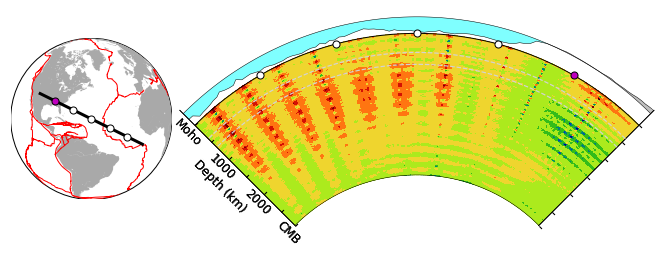

In [63]:
m = Model3D('/Users/rmaguire/Desktop/Manuscripts/Avni/S362ANI+M.BOX25km_PIX1X1.rem3d.nc4')
xsec = plot1section(latitude=35.,                         #required
       longitude=-106.,                                   #required
       azimuth=90,                                        #required
       gcdelta=90,                                        #required
       model='S362ANI+M.BOX25km_PIX1X1.rem3d.nc4',        #required
       parameter='vs',                                    #required
       colorcontour=10,                                   #required
       vmin=-5.,                                          #required
       vmax=5.,                                           #optional
       colorpalette = 'avni',                             #optional
       figuresize=[10,6])                                 #optional

#xsec contains [topo,topotree,model,modeltree]

 #why does plot1section return the topo / model tree objects?

### Plotting a depth map of tomography model

Similarly to above, we can use avni.plot to make a tomographic map at a specified depth using $\mathrm{plots.plot1globalmap}$

In [65]:
gmap = plot1globalmap()
#plot1globalmap(epixarr,
#               vmin,
#               vmax,
#               dbs_path=tools.get_filedir(),
#               colorpalette='rainbow2',
#               projection='robin',
#.              colorlabel="Anomaly (%)",
#               lat_0=0,
#               lon_0=150,
#               outfile=None,
#               shading=False):

TypeError: plot1globalmap() missing 3 required positional arguments: 'epixarr', 'vmin', and 'vmax'

## 2) Working with remote models through the avni API

Now we will describe how to interact with models that are stored on the avni server at UMD. 

In [ ]:
#Make necessary imports
from avni.api.client import Client as avapi
from avni.api.model import Model

### Connect to the avni server to access model database

Connecting the avni server, which hosts a database of 3D global tomography models, requires an "API key". To acquire your API key, register at https://maurya.umd.edu/tools/applets/. Here we will use an activated API key as an example.

In [ ]:
conn=avapi(api_key='ae691a174e5fef17f28bfad58f66956b5ca820f063fbb2e6a41dfffc17c11f6d')

### Create an instance of the Model class, and plot a cross section
An instance of the avni api Model class is initialized by providing the api connection as an argument. A variety of useful class methods then become available. For example, we can list all of the available models on the avni server using the $\mathrm{listModels()}$ method, which returns a dictionary object containing the names and metadata of available models.

To create a cross section of one of the models, we will call the $\mathrm{crossSection()}$ method. This method requires an argument dictionary that specifies the model name and the geometry of the cross section. The required arguments are the latitude and longitude of one endpoint, the azimuth, and the great circle distance. 

<font color='red'>Still need plotting tools written to plot a section / map from the dictionary that's returned from the API call</font>

In [ ]:
ModelInstance = Model(conn)
models_dict = ModelInstance.listModels() #list all available models
print(models_dict)

#create cross section
args = {}                      #empty argument dictionary
args['model'] = 'S362ANI+M'    #tomography model
args['lat'] = 42.2             #latitude of center point
args['lon'] = 232.0            #longitude of center point
args['azimuth'] = 80.0         #azimuth of slice
args['gcdelta'] = 100.0        #great circle distance of the slice in degrees

cross_sec = ModelInstance.crossSection(args)

In [ ]:
cross_sec.keys()